In [2]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


# Combining data

Combining datasets

In [3]:
# drop the rest 
keep_cols_all = ["CANONICAL_SMILES", "INCHIKEY", "active", "dataset", "common_name", "action_type"]


# DrugBank

In [4]:
drugbank = pd.read_csv("./processed/drugbank.csv")

In [5]:
drugbank = drugbank[keep_cols_all]
drugbank

,CANONICAL_SMILES,INCHIKEY,active,dataset,common_name,action_type
0,CC1(C)Cc2c(-c3ccccc3)c(-c3ccc(Cl)cc3)c(CC(=O)O...,UAWXGRJVZSAUSZ-UHFFFAOYSA-N,True,drugbank,Licofelone,substrate
1,C=C1CC[C@H](O)C/C1=C/C=C1\CCC[C@]2(C)[C@@H]([C...,QYSXJUFSXHHAJI-YRZJJWOYSA-N,True,drugbank,Cholecalciferol,substrate
2,COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2...,GXDALQBWZGODGZ-UHFFFAOYSA-N,True,drugbank,Astemizole,substrate
3,O=C(NC[C@H]1CN(c2ccc(N3CCOCC3=O)cc2)C(=O)O1)c1...,KGFYHTZWPPHNLQ-AWEZNQCLSA-N,True,drugbank,Rivaroxaban,substrate
4,CCN(CC)C(=O)[C@@]1(c2ccccc2)C[C@H]1CN,GJJFMKBJSRMPLA-DZGCQCFKSA-N,True,drugbank,Levomilnacipran,substrate
5,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,WXXSNCNJFUAIDG-UHFFFAOYSA-N,True,drugbank,Riociguat,substrate
6,CNc1ccc(C=Cc2ccc(OCCOCCOCC[18F])cc2)cc1,NCWZOASIUQVOFA-KVTPGWOSSA-N,True,drugbank,Florbetaben F-18,substrate
7,CCOC(=O)N[C@@H]1CC[C@@H]2[C@H](CC3C(=O)O[C@H](...,ZBGXUVOIWDMMJE-MTJZJIGHSA-N,True,drugbank,Vorapaxar,substrate
8,Cc1cn2nc(-c3cc(=O)n4cc(N5CCNC6(CC6)C5)ccc4n3)c...,ASKZRYGFUPSJPN-UHFFFAOYSA-N,True,drugbank,Risdiplam,substrate
9,CCCN=C1S/C(=C\c2ccc(OC[C@H](O)CO)c(Cl)c2)C(=O)...,LPAUOXUZGSBGDU-ULCCENQXSA-N,True,drugbank,Ponesimod,substrate


# Karkhanis 2017

In [6]:
karkhanis = pd.read_csv("./processed/karkhanis2017.csv")

In [7]:
karkhanis = karkhanis[keep_cols_all]
karkhanis

,CANONICAL_SMILES,INCHIKEY,active,dataset,common_name,action_type
0,COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2...,GXDALQBWZGODGZ-UHFFFAOYSA-N,True,karkhanis2017,astemizole,substrate
1,CC(C)(C)c1ccc(C(O)CCCN2CCC(C(O)(c3ccccc3)c3ccc...,GUGOEEXESWIERI-UHFFFAOYSA-N,True,karkhanis2017,terfenadine,substrate
2,CC/C(=C(\c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1,NKANXQFJJICGDU-QPLCGJKRSA-N,True,karkhanis2017,tamoxifen,substrate
3,COc1ccc2cc(CCC(C)=O)ccc2c1,BLXXJMDCKKHMKV-UHFFFAOYSA-N,True,karkhanis2017,nabumetone,substrate
4,CN1CCCCC1CCN1c2ccccc2Sc2ccc([S+](C)[O-])cc21,SLVMESMUVMCQIY-UHFFFAOYSA-N,True,karkhanis2017,mesoridazine,substrate
5,CSc1ccc2c(c1)N(CCC1CCCCN1C)c1ccccc1S2,KLBQZWRITKRQQV-UHFFFAOYSA-N,True,karkhanis2017,thioridazine,substrate
6,COc1ccc(-n2nc(C(N)=O)c3c2C(=O)N(c2ccc(N4CCCCC4...,QNZCBYKSOIHPEH-UHFFFAOYSA-N,True,karkhanis2017,apixaban,substrate
7,O=C(NC[C@H]1CN(c2ccc(N3CCOCC3=O)cc2)C(=O)O1)c1...,KGFYHTZWPPHNLQ-AWEZNQCLSA-N,True,karkhanis2017,Rivaroxaban,substrate
8,CCOC(=O)N[C@@H]1CC[C@@H]2[C@H](CC3C(=O)O[C@H](...,ZBGXUVOIWDMMJE-MTJZJIGHSA-N,True,karkhanis2017,Vorapaxar,substrate
9,O=[N+]([O-])O[C@H]1CO[C@H]2[C@@H]1OC[C@H]2O[N+...,MOYKHGMNXAOIAT-JGWLITMVSA-N,True,karkhanis2017,isosorbide dinitrate,substrate


# Lee2010 

In [8]:
lee2010 = pd.read_csv("./processed/lee2010.csv")

In [9]:
lee2010 = lee2010[keep_cols_all]
lee2010

,CANONICAL_SMILES,INCHIKEY,active,dataset,common_name,action_type
0,CCCSc1ccc2[nH]c(NC(=O)OC)nc2c1,HXHWSAZORRCQMX-UHFFFAOYSA-N,True,leow2023,albendazole,inhibitor
1,CCCCc1oc2ccccc2c1C(=O)c1cc(I)c(OCCN(CC)CC)c(I)c1,IYIKLHRQXLHMJQ-UHFFFAOYSA-N,True,leow2023,amiodarone,inhibitor
2,COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2...,GXDALQBWZGODGZ-UHFFFAOYSA-N,True,leow2023,astemizole,inhibitor
3,CSc1ccc2c(c1)N(CCC1CCCCN1C)c1ccccc1S2,KLBQZWRITKRQQV-UHFFFAOYSA-N,True,leow2023,thioridazine,inhibitor
4,CN1CCCCC1CCN1c2ccccc2Sc2ccc([S+](C)[O-])cc21,SLVMESMUVMCQIY-UHFFFAOYSA-N,True,leow2023,mesoridazine,inhibitor
5,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,POZRVZJJTULAOH-LHZXLZLDSA-N,True,leow2023,danazol,inhibitor


# Combine everything


## NOTE

common name being blank is not that these compounds do not have a common name, but that they need to be pulled from pubchem

In [10]:
combined_literature = pd.concat([drugbank, karkhanis, lee2010])

In [11]:
combined_literature.INCHIKEY.duplicated().sum()  # close same result with SMILES

np.int64(6)

In [13]:
combined_literature_chembl = combined_literature

In [14]:
combined_literature.dropna(subset="INCHIKEY", inplace=True)

In [15]:
appears = combined_literature_chembl.groupby("INCHIKEY")["dataset"].nunique().reset_index(name="appears_in_N_datasets")
appears.set_index("INCHIKEY")

,appears_in_N_datasets
INCHIKEY,
AFLFKFHDSCQHOL-IZZDOVSWSA-N,1
ASKZRYGFUPSJPN-UHFFFAOYSA-N,1
BLXXJMDCKKHMKV-UHFFFAOYSA-N,1
GECBBEABIDMGGL-RTBURBONSA-N,1
GJJFMKBJSRMPLA-DZGCQCFKSA-N,1
GUGOEEXESWIERI-UHFFFAOYSA-N,1
GXDALQBWZGODGZ-UHFFFAOYSA-N,3
HXHWSAZORRCQMX-UHFFFAOYSA-N,1
IYIKLHRQXLHMJQ-UHFFFAOYSA-N,1


In [16]:
appears.isna().sum()

INCHIKEY                 0
appears_in_N_datasets    0
dtype: int64

<Axes: xlabel='appears_in_N_datasets', ylabel='count'>

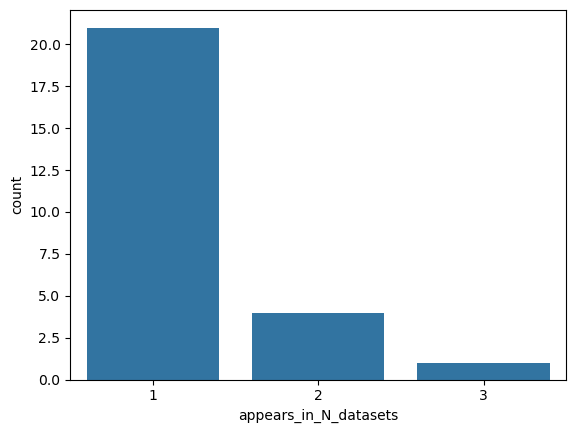

In [17]:
sns.countplot(data=appears, x="appears_in_N_datasets")

In [18]:
combined_literature_chembl_w_counts = combined_literature_chembl.merge(appears, on="INCHIKEY")
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,dataset,common_name,action_type,appears_in_N_datasets
0,CC1(C)Cc2c(-c3ccccc3)c(-c3ccc(Cl)cc3)c(CC(=O)O...,UAWXGRJVZSAUSZ-UHFFFAOYSA-N,True,drugbank,Licofelone,substrate,1
1,C=C1CC[C@H](O)C/C1=C/C=C1\CCC[C@]2(C)[C@@H]([C...,QYSXJUFSXHHAJI-YRZJJWOYSA-N,True,drugbank,Cholecalciferol,substrate,1
2,COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2...,GXDALQBWZGODGZ-UHFFFAOYSA-N,True,drugbank,Astemizole,substrate,3
3,O=C(NC[C@H]1CN(c2ccc(N3CCOCC3=O)cc2)C(=O)O1)c1...,KGFYHTZWPPHNLQ-AWEZNQCLSA-N,True,drugbank,Rivaroxaban,substrate,2
4,CCN(CC)C(=O)[C@@]1(c2ccccc2)C[C@H]1CN,GJJFMKBJSRMPLA-DZGCQCFKSA-N,True,drugbank,Levomilnacipran,substrate,1
5,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,WXXSNCNJFUAIDG-UHFFFAOYSA-N,True,drugbank,Riociguat,substrate,1
6,CNc1ccc(C=Cc2ccc(OCCOCCOCC[18F])cc2)cc1,NCWZOASIUQVOFA-KVTPGWOSSA-N,True,drugbank,Florbetaben F-18,substrate,1
7,CCOC(=O)N[C@@H]1CC[C@@H]2[C@H](CC3C(=O)O[C@H](...,ZBGXUVOIWDMMJE-MTJZJIGHSA-N,True,drugbank,Vorapaxar,substrate,2
8,Cc1cn2nc(-c3cc(=O)n4cc(N5CCNC6(CC6)C5)ccc4n3)c...,ASKZRYGFUPSJPN-UHFFFAOYSA-N,True,drugbank,Risdiplam,substrate,1
9,CCCN=C1S/C(=C\c2ccc(OC[C@H](O)CO)c(Cl)c2)C(=O)...,LPAUOXUZGSBGDU-ULCCENQXSA-N,True,drugbank,Ponesimod,substrate,1


In [19]:
df_dummies = pd.get_dummies(combined_literature_chembl_w_counts['dataset'], prefix='dataset').join(combined_literature_chembl_w_counts["INCHIKEY"])
df_dummies

,dataset_drugbank,dataset_karkhanis2017,dataset_leow2023,INCHIKEY
0,True,False,False,UAWXGRJVZSAUSZ-UHFFFAOYSA-N
1,True,False,False,QYSXJUFSXHHAJI-YRZJJWOYSA-N
2,True,False,False,GXDALQBWZGODGZ-UHFFFAOYSA-N
3,True,False,False,KGFYHTZWPPHNLQ-AWEZNQCLSA-N
4,True,False,False,GJJFMKBJSRMPLA-DZGCQCFKSA-N
5,True,False,False,WXXSNCNJFUAIDG-UHFFFAOYSA-N
6,True,False,False,NCWZOASIUQVOFA-KVTPGWOSSA-N
7,True,False,False,ZBGXUVOIWDMMJE-MTJZJIGHSA-N
8,True,False,False,ASKZRYGFUPSJPN-UHFFFAOYSA-N
9,True,False,False,LPAUOXUZGSBGDU-ULCCENQXSA-N


In [20]:
df_result = df_dummies.groupby('INCHIKEY').max().reset_index()
df_result = df_result.set_index("INCHIKEY")

In [21]:
# cat_dataname = combined_literature_chembl.groupby("INCHIKEY")["dataset"].apply(lambda x: "_+_".join(x)).reset_index(name="dataset_comb").set_index("INCHIKEY")
# cat_dataname

In [22]:
combined_literature_chembl_w_counts = combined_literature_chembl_w_counts.merge(df_result, on="INCHIKEY")
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,dataset,common_name,action_type,appears_in_N_datasets,dataset_drugbank,dataset_karkhanis2017,dataset_leow2023
0,CC1(C)Cc2c(-c3ccccc3)c(-c3ccc(Cl)cc3)c(CC(=O)O...,UAWXGRJVZSAUSZ-UHFFFAOYSA-N,True,drugbank,Licofelone,substrate,1,True,False,False
1,C=C1CC[C@H](O)C/C1=C/C=C1\CCC[C@]2(C)[C@@H]([C...,QYSXJUFSXHHAJI-YRZJJWOYSA-N,True,drugbank,Cholecalciferol,substrate,1,True,False,False
2,COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2...,GXDALQBWZGODGZ-UHFFFAOYSA-N,True,drugbank,Astemizole,substrate,3,True,True,True
3,O=C(NC[C@H]1CN(c2ccc(N3CCOCC3=O)cc2)C(=O)O1)c1...,KGFYHTZWPPHNLQ-AWEZNQCLSA-N,True,drugbank,Rivaroxaban,substrate,2,True,True,False
4,CCN(CC)C(=O)[C@@]1(c2ccccc2)C[C@H]1CN,GJJFMKBJSRMPLA-DZGCQCFKSA-N,True,drugbank,Levomilnacipran,substrate,1,True,False,False
5,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,WXXSNCNJFUAIDG-UHFFFAOYSA-N,True,drugbank,Riociguat,substrate,1,True,False,False
6,CNc1ccc(C=Cc2ccc(OCCOCCOCC[18F])cc2)cc1,NCWZOASIUQVOFA-KVTPGWOSSA-N,True,drugbank,Florbetaben F-18,substrate,1,True,False,False
7,CCOC(=O)N[C@@H]1CC[C@@H]2[C@H](CC3C(=O)O[C@H](...,ZBGXUVOIWDMMJE-MTJZJIGHSA-N,True,drugbank,Vorapaxar,substrate,2,True,True,False
8,Cc1cn2nc(-c3cc(=O)n4cc(N5CCNC6(CC6)C5)ccc4n3)c...,ASKZRYGFUPSJPN-UHFFFAOYSA-N,True,drugbank,Risdiplam,substrate,1,True,False,False
9,CCCN=C1S/C(=C\c2ccc(OC[C@H](O)CO)c(Cl)c2)C(=O)...,LPAUOXUZGSBGDU-ULCCENQXSA-N,True,drugbank,Ponesimod,substrate,1,True,False,False


In [23]:
combined_literature_chembl_w_counts.action_type.value_counts()

action_type
substrate    26
inhibitor     6
Name: count, dtype: int64

In [24]:
combined_literature_chembl_w_counts.INCHIKEY.nunique()

26

In [25]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

np.int64(0)

In [35]:
# we can just sort by appears_in_N_ChEMBL_assays to get all the chembl data at the top, then uniquify on INCHIKEY

combined_literature_chembl_w_counts.sort_values(["appears_in_N_datasets"], ascending=[False],  inplace=True)


In [36]:
# fill common name from gropupby 
combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


/tmp/ipykernel_153322/1877288904.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [37]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

np.int64(0)

In [38]:
combined_literature_chembl_w_counts.head()

,CANONICAL_SMILES,INCHIKEY,active,dataset,common_name,action_type,appears_in_N_datasets,dataset_drugbank,dataset_karkhanis2017,dataset_leow2023
2,COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2...,GXDALQBWZGODGZ-UHFFFAOYSA-N,True,drugbank,Astemizole,substrate,3,True,True,True
3,O=C(NC[C@H]1CN(c2ccc(N3CCOCC3=O)cc2)C(=O)O1)c1...,KGFYHTZWPPHNLQ-AWEZNQCLSA-N,True,drugbank,Rivaroxaban,substrate,2,True,True,False
7,CCOC(=O)N[C@@H]1CC[C@@H]2[C@H](CC3C(=O)O[C@H](...,ZBGXUVOIWDMMJE-MTJZJIGHSA-N,True,drugbank,Vorapaxar,substrate,2,True,True,False
20,CSc1ccc2c(c1)N(CCC1CCCCN1C)c1ccccc1S2,KLBQZWRITKRQQV-UHFFFAOYSA-N,True,karkhanis2017,thioridazine,substrate,2,False,True,True
19,CN1CCCCC1CCN1c2ccccc2Sc2ccc([S+](C)[O-])cc21,SLVMESMUVMCQIY-UHFFFAOYSA-N,True,karkhanis2017,mesoridazine,substrate,2,False,True,True


In [39]:
combined_literature_chembl_w_counts.drop_duplicates(subset="INCHIKEY", inplace=True)

In [40]:
combined_literature_chembl_w_counts["action_type"] = combined_literature_chembl_w_counts["action_type"].fillna("inhibitor")

In [41]:
combined_literature_chembl_w_counts["inclusion_score"] =  combined_literature_chembl_w_counts["appears_in_N_datasets"].fillna(0)

In [42]:
combined_literature_chembl_w_counts.drop(columns="dataset", inplace=True)

In [43]:
combined_literature_chembl_w_counts.sort_values("inclusion_score", ascending=False, inplace=True)

In [44]:
combined_literature_chembl_w_counts.to_csv("final/actives_final.csv", index=False)

In [45]:
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,common_name,action_type,appears_in_N_datasets,dataset_drugbank,dataset_karkhanis2017,dataset_leow2023,inclusion_score
2,COc1ccc(CCN2CCC(Nc3nc4ccccc4n3Cc3ccc(F)cc3)CC2...,GXDALQBWZGODGZ-UHFFFAOYSA-N,True,Astemizole,substrate,3,True,True,True,3
3,O=C(NC[C@H]1CN(c2ccc(N3CCOCC3=O)cc2)C(=O)O1)c1...,KGFYHTZWPPHNLQ-AWEZNQCLSA-N,True,Rivaroxaban,substrate,2,True,True,False,2
7,CCOC(=O)N[C@@H]1CC[C@@H]2[C@H](CC3C(=O)O[C@H](...,ZBGXUVOIWDMMJE-MTJZJIGHSA-N,True,Vorapaxar,substrate,2,True,True,False,2
20,CSc1ccc2c(c1)N(CCC1CCCCN1C)c1ccccc1S2,KLBQZWRITKRQQV-UHFFFAOYSA-N,True,thioridazine,substrate,2,False,True,True,2
19,CN1CCCCC1CCN1c2ccccc2Sc2ccc([S+](C)[O-])cc21,SLVMESMUVMCQIY-UHFFFAOYSA-N,True,mesoridazine,substrate,2,False,True,True,2
0,CC1(C)Cc2c(-c3ccccc3)c(-c3ccc(Cl)cc3)c(CC(=O)O...,UAWXGRJVZSAUSZ-UHFFFAOYSA-N,True,Licofelone,substrate,1,True,False,False,1
5,COC(=O)N(C)c1c(N)nc(-c2nn(Cc3ccccc3F)c3ncccc23...,WXXSNCNJFUAIDG-UHFFFAOYSA-N,True,Riociguat,substrate,1,True,False,False,1
6,CNc1ccc(C=Cc2ccc(OCCOCCOCC[18F])cc2)cc1,NCWZOASIUQVOFA-KVTPGWOSSA-N,True,Florbetaben F-18,substrate,1,True,False,False,1
1,C=C1CC[C@H](O)C/C1=C/C=C1\CCC[C@]2(C)[C@@H]([C...,QYSXJUFSXHHAJI-YRZJJWOYSA-N,True,Cholecalciferol,substrate,1,True,False,False,1
4,CCN(CC)C(=O)[C@@]1(c2ccccc2)C[C@H]1CN,GJJFMKBJSRMPLA-DZGCQCFKSA-N,True,Levomilnacipran,substrate,1,True,False,False,1


In [46]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["inclusion_score"].astype(int)

<Axes: xlabel='inclusion_score', ylabel='count'>

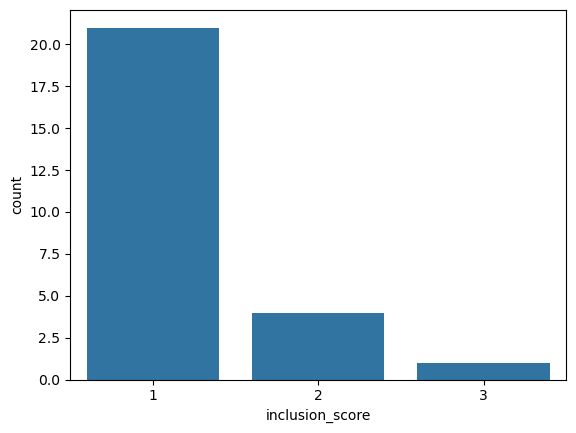

In [47]:
sns.countplot(combined_literature_chembl_w_counts, x="inclusion_score")